In [1]:
cd '/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints'

/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints


In [2]:
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import multiprocessing

# Runs a single iteration of Random Walk Metropolis targeting toy_log_pdf
# and returns the Euclidean normed difference between the estimated mean and
# covariance matrix versus the true values
def run_single_RWM(toy_log_pdf, num_iterations, x0):
    # Create sampler
    mcmc = pints.MCMCSampling(toy_log_pdf, 4, x0, method=pints.MetropolisRandomWalkMCMC)

    # Set maximum number of iterations
    mcmc.set_max_iterations(num_iterations)

    # Disable logging
    mcmc.set_log_to_screen(False)

    # Number of chains
    num_chains = 4
    
    # Run!
    chains = mcmc.run()
    
    # Discard warm up
    chains = chains[:, int(num_iterations / 2.0):, :]
    
    # Calculate covariance matrix
    result_object = pints._mcmc._result.McmcResultObject(chains)
    cov_est = np.cov(result_object.extract_all().T)
    
    # Compare with true
    cov_true = log_pdf.covariance_matrix()
    error_cov = np.linalg.norm(toy_log_pdf.covariance_matrix() - cov_est)
    error_mean = np.linalg.norm(np.mean(result_object.extract_all(),axis=0))
    
    return error_mean, error_cov

def wrapper(i):
    return run_single_RWM(log_pdf, 8000, lX0[i])

# Create X0 outside of parallelisation otherwise joblib uses same seed in all child processes
def create_x0(num_iterates, dimension, extremum):
    lX0 = []
    for i in range(num_iterates):
        lX0.append(np.random.uniform(np.full(dimension, -1*extremum), np.full(dimension, extremum),size=(4, dimension)))
    return lX0

num_iterates = 200
num_cores = 10
inputs = np.arange(num_iterates)

In [3]:
cd '/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints/studies'

/Volumes/OS X EL CAPITAN/Dropbox/Pints/Pints1/pints/studies


# 3D normal with correlation between dimensions of 0.5

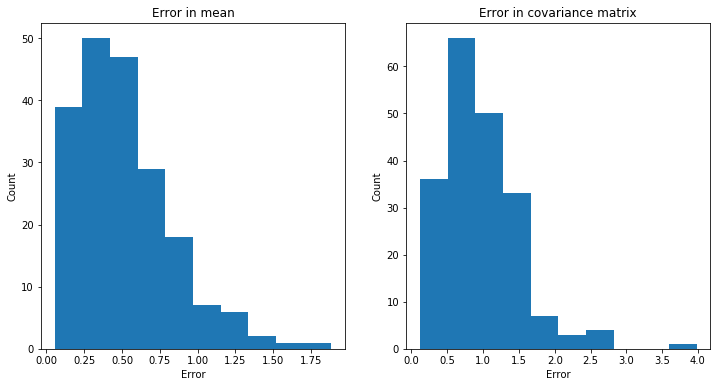

In [4]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=3,correlation=0.5)
lX0 = create_x0(num_iterates, 3, 8)
results_3_low = np.asarray(Parallel(n_jobs=num_cores)(delayed(wrapper)(i) for i in inputs))

results_temp = results_3_low
fig = plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.hist(results_temp[:,0])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in mean')

plt.subplot(122)
plt.hist(results_temp[:,1])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in covariance matrix')
plt.show()

np.savetxt("RWM_error_3d_normal_low.csv", results_3_low, delimiter=",")

# 3D normal with correlation = 0.95

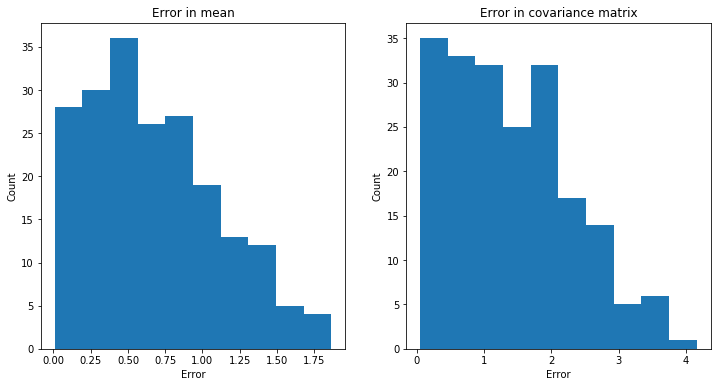

In [5]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=3,correlation=0.95)
lX0 = create_x0(num_iterates, 3, 8)
results_3_high = np.asarray(Parallel(n_jobs=num_cores)(delayed(wrapper)(i) for i in inputs))

results_temp = results_3_high
fig = plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.hist(results_temp[:,0])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in mean')

plt.subplot(122)
plt.hist(results_temp[:,1])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in covariance matrix')
plt.show()

np.savetxt("RWM_error_3d_normal_high.csv", results_3_high, delimiter=",")

# 6D normal with correlation = 0.5

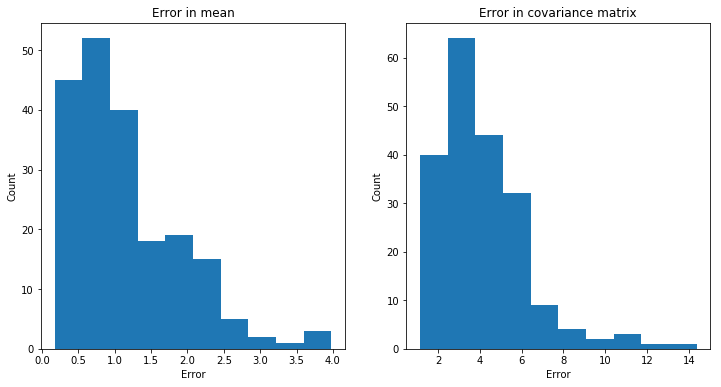

In [6]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=6,correlation=0.5)
lX0 = create_x0(num_iterates, 6, 8)
results_6_low = np.asarray(Parallel(n_jobs=num_cores)(delayed(wrapper)(i) for i in inputs))

results_temp = results_6_low
fig = plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.hist(results_temp[:,0])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in mean')

plt.subplot(122)
plt.hist(results_temp[:,1])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in covariance matrix')
plt.show()

np.savetxt("RWM_error_6d_normal_low.csv", results_6_low, delimiter=",")

# 6D normal with correlation = 0.95

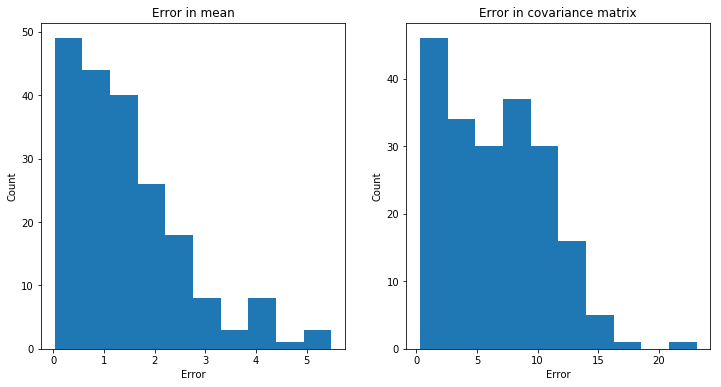

In [7]:
log_pdf = toy.HighDimensionalNormalLogPDF(dimension=6,correlation=0.95)
lX0 = create_x0(num_iterates, 6, 8)
results_6_high = np.asarray(Parallel(n_jobs=num_cores)(delayed(wrapper)(i) for i in inputs))

results_temp = results_6_high
fig = plt.figure(figsize=(12, 6)) 
plt.subplot(121)
plt.hist(results_temp[:,0])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in mean')

plt.subplot(122)
plt.hist(results_temp[:,1])
plt.xlabel('Error')
plt.ylabel('Count')
plt.title('Error in covariance matrix')
plt.show()

np.savetxt("RWM_error_6d_normal_high.csv", results_6_high, delimiter=",")

# Comparing

In [17]:
print('3d low correlation maxima = ' + str(np.max(results_3_low,axis=0)))
print('3d high correlation maxima = ' + str(np.max(results_3_high,axis=0)))
print('6d low correlation maxima = ' + str(np.max(results_6_low,axis=0)))
print('6d high correlation maxima = ' + str(np.max(results_6_high,axis=0)))

3d low correlation maxima = [ 1.88351553  3.98123963]
3d high correlation maxima = [ 1.86652482  4.16197417]
6d low correlation maxima = [  3.97855589  14.37698194]
6d high correlation maxima = [  5.48320669  23.11853263]
